<a href="https://colab.research.google.com/github/danielaguirrec/CalculadoraResistencia/blob/master/ML_S6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## APRENDIZAJE NO SUPERVISADO
### Daniel Alejandro Aguirre Ceballos
### ML_ACTIVIDAD_S6
#### ING. JUAN CARLOS VALENCIA
#### 2024 - 10 -21




# PARTE I

##  ● Seleccione el dataset para clustering.
Se utiliza el dataset almacenado en la variable url1




##   ● Realice la carga de datos desde Python (Google Colab) o R-studio.
Utilizamos Colab


Carga de datos:
 Inicialmente se cargaran 2 dataframes desde:

 url1 ="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"


In [12]:
#importo las libreria vistas en clase y les asigno un acronimo/alias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Creo una lista que contiene el nombre de las columnas de la base de datos
COLUMNS1 = ["age","workclass","fnlwgt","education","education_num","marital","occupation",
           "relationship","race","sex","capital_gain","capital_loss","hours_week","native_country","label"]

#copia el URL en una variable, por buenas practicas
url1 ="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
path ="/content/breast-cancer.csv"
#Leo la base de datos desde la url
#creo un try except por si falla la lectura de la base de datos, no genere un error el programa
try:
#Leo la base de datos desde la url
    df1 = pd.read_csv(url1,names=COLUMNS1)
    df2 = pd.read_csv(path)


except:
    print("No se encontro el URL")

## ● Realice el entrenamiento del modelo seleccionado (vea textos sugeridos en taller). K-means



NameError: name 'df1' is not defined

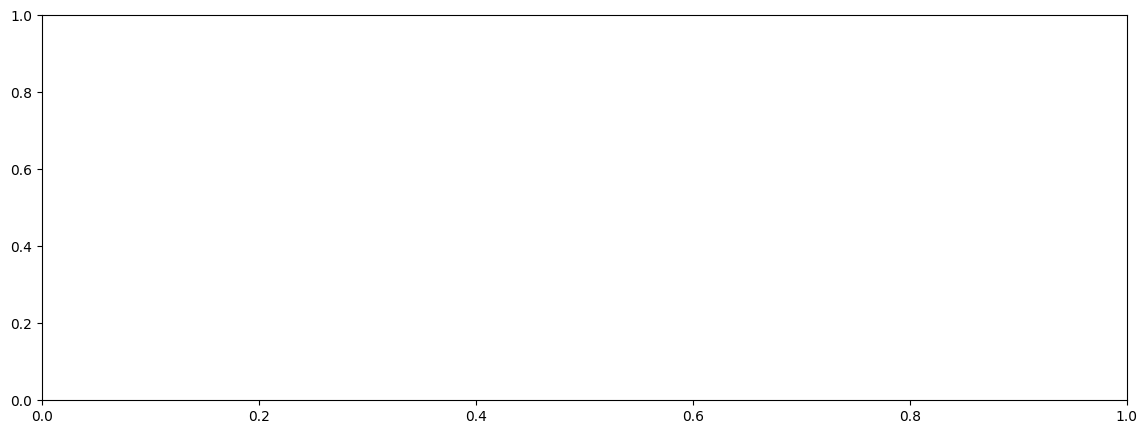

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Configuro para que las plos se grafiquen un lado al otro
fig, axs = plt.subplots(1, 1, figsize=(14, 5))  # 1 fila, 1 columna

# Ajustar K-Means para df1
kmeans_per_k1 = [KMeans(n_clusters=k, random_state=1995).fit(df1) for k in range(1, 10)]
inertias1 = [model.inertia_ for model in kmeans_per_k1]

# Graficar la inercia para df1
axs.plot(range(1, 10), inertias1, "bo-")
axs.set_xlabel("$k's$", fontsize=14)
axs.set_ylabel("Inertia", fontsize=14)
axs.set_title("Inercia para df1", fontsize=16)

# Anotación del "codo" para df1
axs.annotate('Elbow',
             xy=(4, inertias1[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.tight_layout()
plt.show()


In [ ]:
#modificar a df ya que porser numpy cambiaron de tipo
from numpy import unique,where
from matplotlib import pyplot

# Modelo KMeans
num_clusters = 4
# Aplicar K-Means con los datos combinados
kmeans1 = KMeans(n_clusters=num_clusters, random_state=1995, init="random", n_init=10)
kmeans1_model =kmeans1.fit(df1)
kmeans1_result= kmeans1_model.predict(df1)
kmeans1_clusters = unique(kmeans1_result)
# Asignar los clústeres al DataFrame 1


for kmeans_cluster in kmeans1_clusters:
  index = where(kmeans1_result == kmeans_cluster)
  pyplot.scatter(df1[index,0],df1[index,1])
  print(index)
pyplot.tight_layout()
pyplot.show()
df1_new = pd.DataFrame(df1, columns=COLUMNS1)
df1_new['cluster'] = kmeans1.labels_




## ● Realice la prueba del modelo seleccionado.
Realizamos PCA para analizar como se comporta el clustering

In [ ]:
# Reducir a 2 dimensiones usando PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_new)  # X es la matriz con datos combinados (texto vectorizado + numéricos)

# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(df1_pca[:, 0], df1_pca[:, 1], c=kmeans1.labels_, cmap='viridis')
plt.title('Clusters visualizados con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Cluster')
plt.show()

## ● Comente los resultados obtenidos.


*   Para utilizar los metodos de las librerías como sklearn entre otras, es neesario, adecuar los datos, de tal forma que estén en el formato y/o tipo necesario. Como por ejemplo, que todos los valors sean numericos

*   Existen varios metodos de agrupación. Sin  embargo, cada metodo tiene sus diferentes caracteristicas, las cuales dependiendo del contexto o necesidad de agrupar por medio de diferentes metricas se usa uno u otro modelo.

*   Es posible mejorar la interpretación visual de los clustering, realizando técnicas como PCA.





## ● Otros comentarios que parezcan adecuados.




# PARTE II




muestra como tumor o no tumor.

### STEP 1
* Importar el conjunto de datos
* Analizar el conjunto de datos
* Eliminar valores nulos
* Transformar variables
* Normalizar datos

In [13]:
#copia el URL en una variable, por buenas practicas
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

path ="/content/breast-cancer.csv"
#Leo la base de datos desde la url
#creo un try except por si falla la lectura de la base de datos, no genere un error el programa
try:
#Leo la base de datos desde la url
    df2 = pd.read_csv(path)
except:
    print("No se encontro el URL")

# Genero los tipos de datos del data set y los estaditicos decriptivos del DF
# DF2
print(df2.dtypes)
print(df2.describe())

print("Nulos:")
print(df2.isnull().sum())
print("No hay nulos")

# 1. Eliminar la columna 'id' si no es necesaria
df2 = df2.drop(columns=['id'])

# 2. Codificamos la variable objetivo
#   B = 0
#   M = 1
label_encoder = LabelEncoder()
df2['diagnosis'] = label_encoder.fit_transform(df2['diagnosis'])

# 3. Normalizo los valores de las columnas numericas
scaler = MinMaxScaler()
numeric_columns = df2.select_dtypes(include=['float64']).columns
df2[numeric_columns] = scaler.fit_transform(df2[numeric_columns])

# 4. Mostrar el DataFrame preparado
print(df2.head())


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

## STEP 2
Definir arquitectura de modelo.

Para este paso utilizaremos 2 modelos de aprendizaje supervisado

2.0 Particionar el set de entreno y prueba

2.1 Random Forest

2.2 Redes neuronales



### 2.0 Particionar el set de entreno y prueba

In [14]:
# Cargar los datos (reemplaza 'tu_archivo.csv' con el nombre de tu archivo)
# df2 = pd.read_csv('tu_archivo.csv')

# Supongamos que df2 ya está cargado y preparado.
# Dividir en características (X) y etiqueta (y)
X = df2.drop(columns=['diagnosis'])
y = df2['diagnosis']

# Dividir los datos en conjunto de entrenamiento 80% y prueba 20% con una semilla de 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.1 Random Forest

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



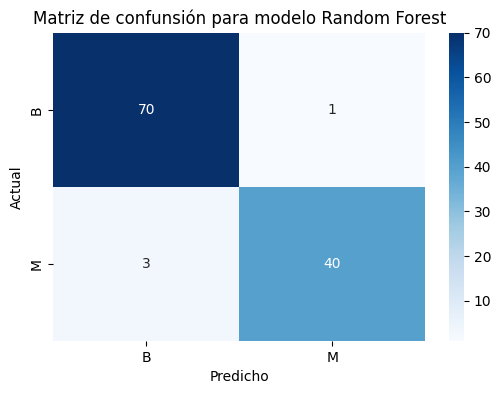


Random Forest misclassifications: 4

Random Forest misclassifications indices: [ 8 20 77 82]
Variables mas importantes en el Random Forest:
1. area_worst - 0.15
2. concave points_worst - 0.14
3. concave points_mean - 0.11
4. radius_worst - 0.08
5. concavity_mean - 0.07
6. perimeter_worst - 0.07
7. perimeter_mean - 0.05
8. radius_mean - 0.05
9. area_mean - 0.05
10. concavity_worst - 0.03
11. area_se - 0.02
12. texture_worst - 0.02
13. compactness_worst - 0.02
14. radius_se - 0.02
15. compactness_mean - 0.01
16. texture_mean - 0.01
17. perimeter_se - 0.01
18. smoothness_worst - 0.01
19. symmetry_worst - 0.01
20. concavity_se - 0.01
21. smoothness_mean - 0.01
22. fractal_dimension_se - 0.01
23. compactness_se - 0.01
24. fractal_dimension_worst - 0.01
25. texture_se - 0.00
26. smoothness_se - 0.00
27. symmetry_se - 0.00
28. fractal_dimension_mean - 0.00
29. symmetry_mean - 0.00
30. concave points_se - 0.00


In [15]:



# 2.1 Modelo random forest
random_Forest_modelo = RandomForestClassifier(random_state=42)
random_Forest_modelo.fit(X_train, y_train)
rf_predictions = random_Forest_modelo.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# Matriz de confusión para Random Forest
confusion_rf = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.title("Matriz de confunsión para modelo Random Forest")
plt.xlabel("Predicho")
plt.ylabel("Actual")
plt.show()

# Análisis de errores
rf_errors = np.where(rf_predictions != y_test)[0]
print(f"\nRandom Forest misclassifications: {len(rf_errors)}")
print("\nRandom Forest misclassifications indices:", rf_errors)

# Importancia de las variables en Random Forest
importances = random_Forest_modelo.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar variables más importantes
print("Variables mas importantes en el Random Forest:")
for f in range(30):
    print(f"{f + 1}. {X.columns[indices[f]]} - {importances[indices[f]]:.2f}")


### 2.2 Redes Neuronales

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6443 - loss: 0.6571
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8696 - loss: 0.5007
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9152 - loss: 0.3286
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9070 - loss: 0.2462
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9450 - loss: 0.1889
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9348 - loss: 0.1572
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9411 - loss: 0.1573
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9514 - loss: 0.1216
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9533 - loss: 0.1271
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9573 - loss: 0.1151
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9739 - loss: 0.0959
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9588 - loss: 0.0987


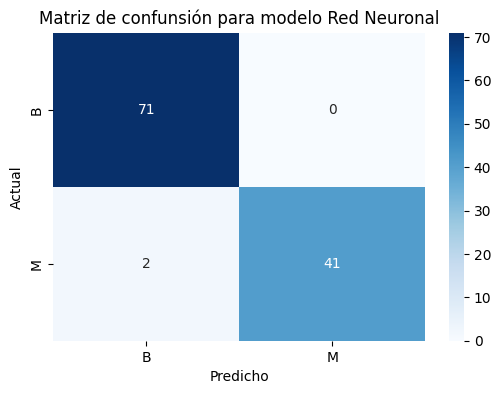

Neural Network misclassifications indices: [20 77]
Neural Network misclassifications: 2


In [16]:

# Entrenar una red neuronal
red_Neuronal_modelo = Sequential()
red_Neuronal_modelo.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
red_Neuronal_modelo.add(Dense(32, activation='relu'))
red_Neuronal_modelo.add(Dense(1, activation='sigmoid'))  # Para clasificación binaria

# Compilar el modelo
red_Neuronal_modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ajustar el modelo a los datos de entrenamiento
red_Neuronal_modelo.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Hacer predicciones y evaluar la red neuronal
red_neuronal_prediccion = (red_Neuronal_modelo.predict(X_test) > 0.5).astype("int32")
print("\nNeural Network")
print("Accuracy:", accuracy_score(y_test, red_neuronal_prediccion))
print(classification_report(y_test, red_neuronal_prediccion))

# Matriz de confusión para la red neuronal
confusion_nn = confusion_matrix(y_test, red_neuronal_prediccion)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.title("Matriz de confunsión para modelo Red Neuronal")
plt.xlabel("Predicho")
plt.ylabel("Actual")
plt.show()

#analisis errores
nn_errors = np.where(red_neuronal_prediccion.flatten() != y_test)[0]

print("Neural Network misclassifications indices:", nn_errors)
print(f"Neural Network misclassifications: {len(nn_errors)}")



## Referencias bibliograficas
* Gonzalez, A., & Figueiredo, M. A. T. (2021). K-Means clustering: A survey and a new optimization method. Artificial Intelligence Review, 54(4), 2589-262

* Jolliffe, I. T., & Cadima, J. (2016). Principal component analysis: A review and recent developments. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 374(2065), 20150202.

* Karypis, G. (2019). Clustering. In Encyclopedia of Machine Learning and Data Mining (2nd ed., pp. 207-215)